In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data collection

In [2]:
# Load the dataset
data = pd.read_csv('apps.csv')

In [3]:
# Display the first few rows of the dataset
data.head(3)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


# Data Cleaning

In [5]:
# Check for missing values
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
# Drop rows with any null values
data.dropna(inplace=True)

In [10]:
# Convert 'Reviews' to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'])

In [11]:
# Convert 'Installs' to numeric by removing '+' and ',' characters
data['Installs'] = data['Installs'].str.replace(',','').str.replace('+','').astype(int)

In [12]:
# Convert 'Price' to numeric by removing '$' sign
data['Price'] = data['Price'].str.replace('$','').astype(float)

In [15]:
# Convert 'Size' to numeric by removing 'M' and 'k' characters
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1e6
        elif 'k' in size:
            return float(size.replace('k', '')) * 1e3
        else:
            return np.nan
    else:
        return size

In [16]:
data['Size'] = data['Size'].apply(convert_size)

In [19]:
# Fill missing 'Size' values with the mean size
data['Size'].fillna(data['Size'].mean())

0       19.0
1       14.0
2        8.7
3       25.0
4        2.8
        ... 
9651     0.6
9652     2.6
9654    53.0
9655     3.6
9658    19.0
Name: Size, Length: 7021, dtype: float64

In [21]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Data Analysis

In [23]:
# Summary statistics
data.describe()

,Unnamed: 0,Rating,Reviews,Size,Installs,Price
count,7021.000000,7021.000000,7.021000e+03,7021.000000,7.021000e+03,7021.000000
mean,5638.433984,4.160704,1.448960e+05,21.767597,4.471804e+06,1.174222
std,3079.108366,0.559241,1.024428e+06,22.731237,2.714908e+07,18.205355
min,0.000000,1.000000,1.000000e+00,0.000000,1.000000e+00,0.000000
25%,3087.000000,4.000000,8.400000e+01,4.900000,1.000000e+04,0.000000
50%,5716.000000,4.300000,1.546000e+03,13.000000,1.000000e+05,0.000000
75%,8292.000000,4.500000,2.658700e+04,31.000000,1.000000e+06,0.000000
max,10840.000000,5.000000,4.489172e+07,100.000000,1.000000e+09,400.000000


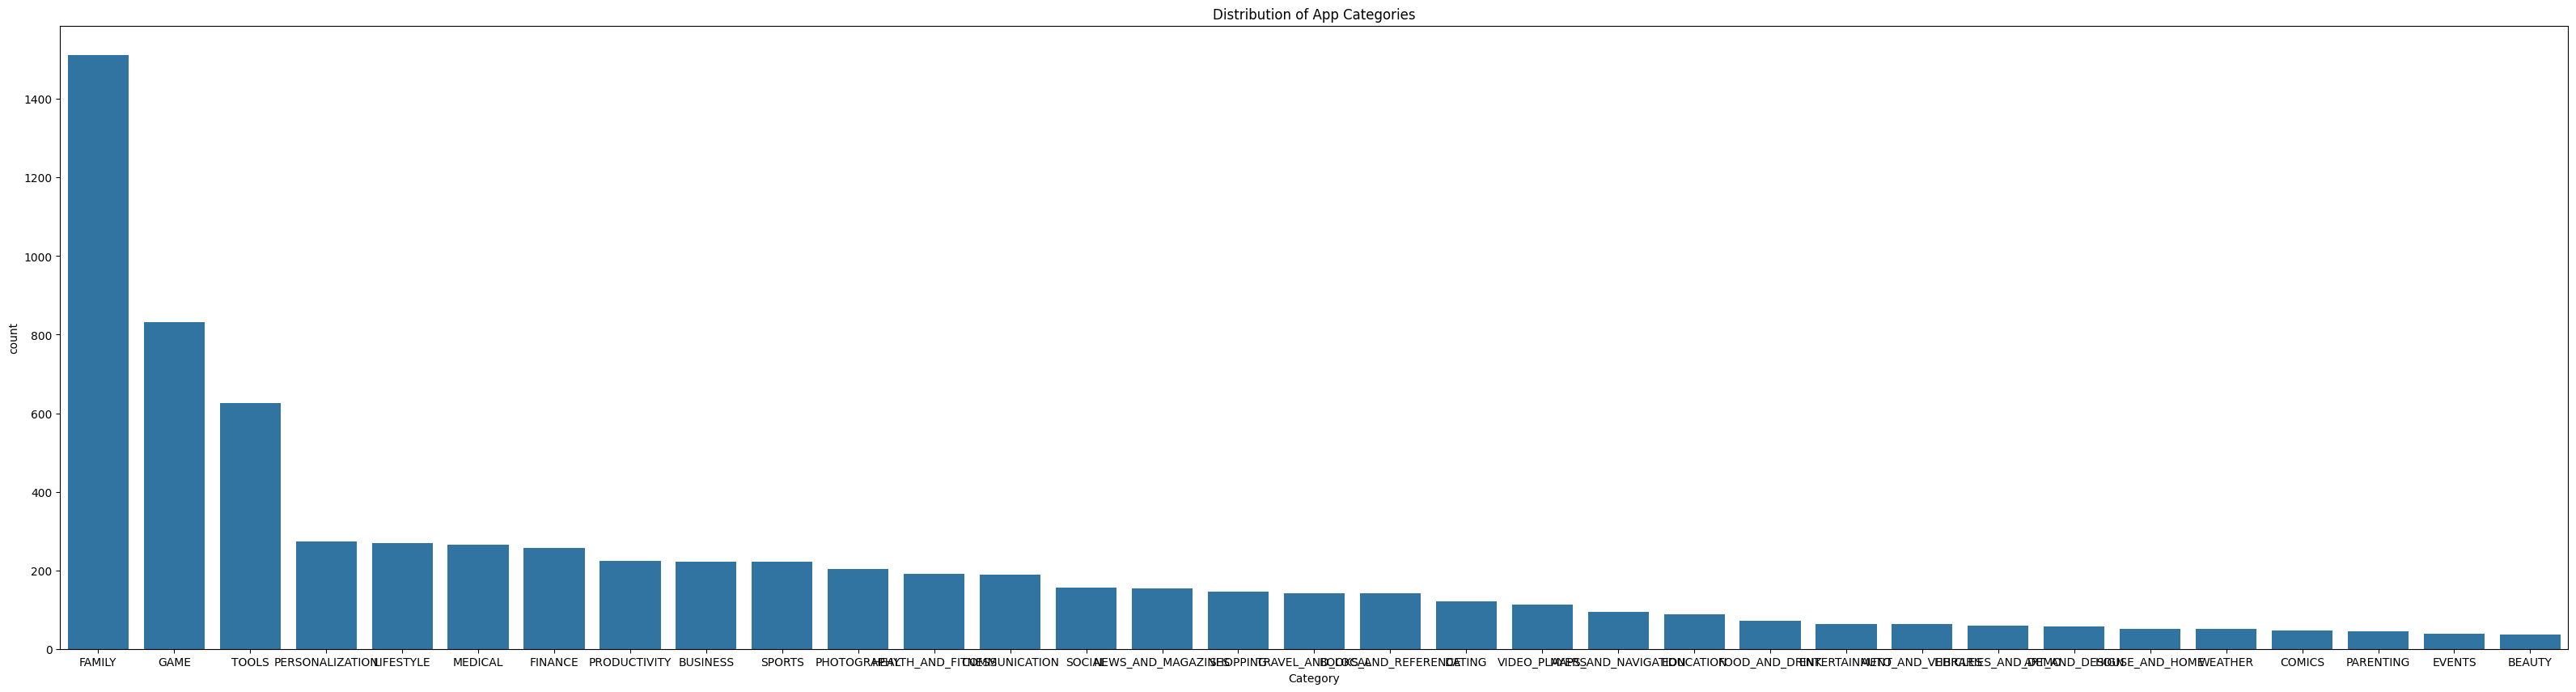

In [30]:
# Distribution of app categories
plt.figure(figsize=(40,10))
sns.countplot(x = 'Category',data=data,order=data['Category'].value_counts().index)
plt.title('Distribution of App Categories')
plt.show()

In [34]:
# Most popular apps by installs
top_installed_app = data.sort_values(by='Installs',ascending=False).head(10)

In [36]:
top_installed_app[['App', 'Category', 'Installs']]

,App,Category,Installs
1356,Subway Surfers,GAME,1000000000
2977,Google News,NEWS_AND_MAGAZINES,1000000000
1357,Candy Crush Saga,GAME,500000000
2739,Dropbox,PRODUCTIVITY,500000000
311,imo free video calls and chat,COMMUNICATION,500000000
1363,Temple Run 2,GAME,500000000
1364,Pou,GAME,500000000
342,UC Browser - Fast Download Private & Secure,COMMUNICATION,500000000
4623,Samsung Health,HEALTH_AND_FITNESS,500000000
2527,SHAREit - Transfer & Share,TOOLS,500000000


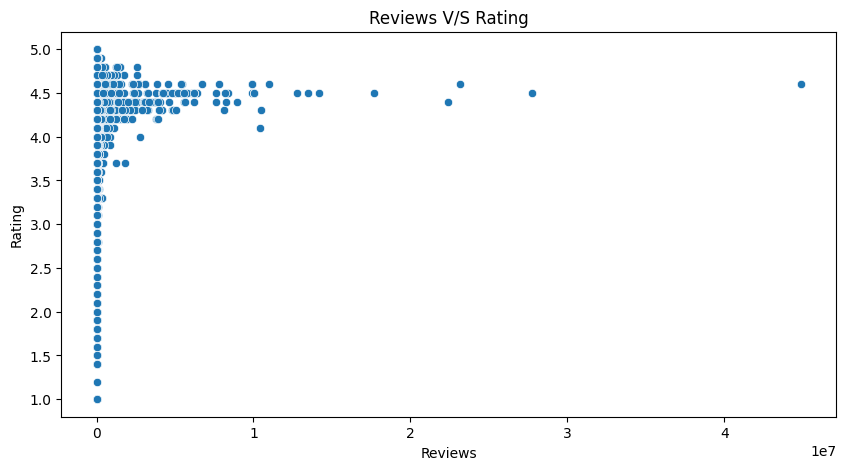

In [43]:
# Correlation between reviews and rating
plt.figure(figsize=(10,5))
sns.scatterplot(x='Reviews',y='Rating',data=data)
plt.title('Reviews V/S Rating')
plt.show()

# Advanced Analysis

In [44]:
from sklearn.cluster import KMeans

In [45]:
# Clustering apps based on Size and Installs
features = data[['Size','Installs']]

In [46]:
features

,Size,Installs
0,19.0,10000
1,14.0,500000
2,8.7,5000000
3,25.0,50000000
4,2.8,100000
...,...,...
9651,0.6,1000
9652,2.6,500
9654,53.0,5000
9655,3.6,100


In [47]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

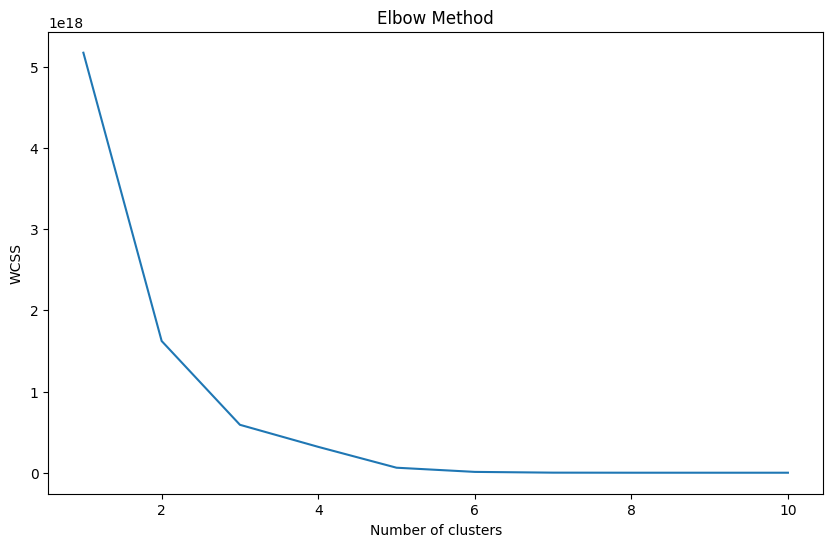

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Applying k-means to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y = kmeans.fit_predict(features)

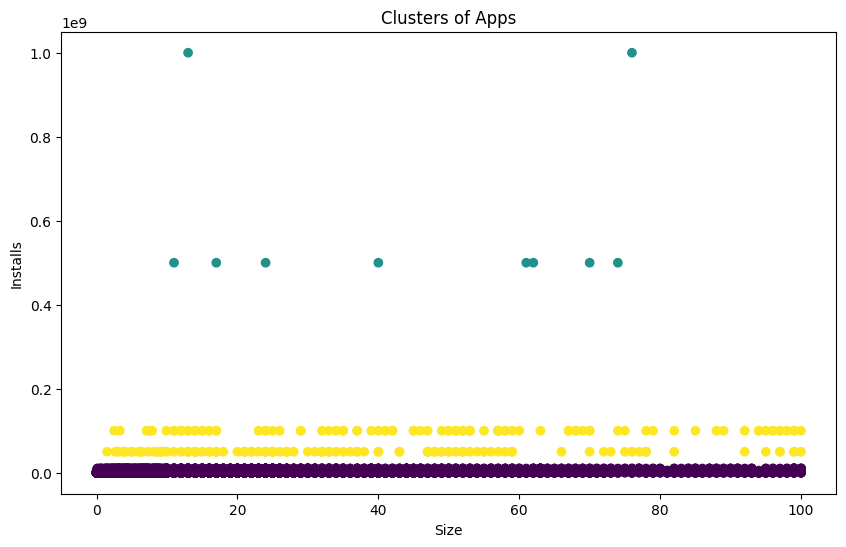

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(features['Size'], features['Installs'], c=pred_y, cmap='viridis')
plt.title('Clusters of Apps')
plt.xlabel('Size')
plt.ylabel('Installs')
plt.show()

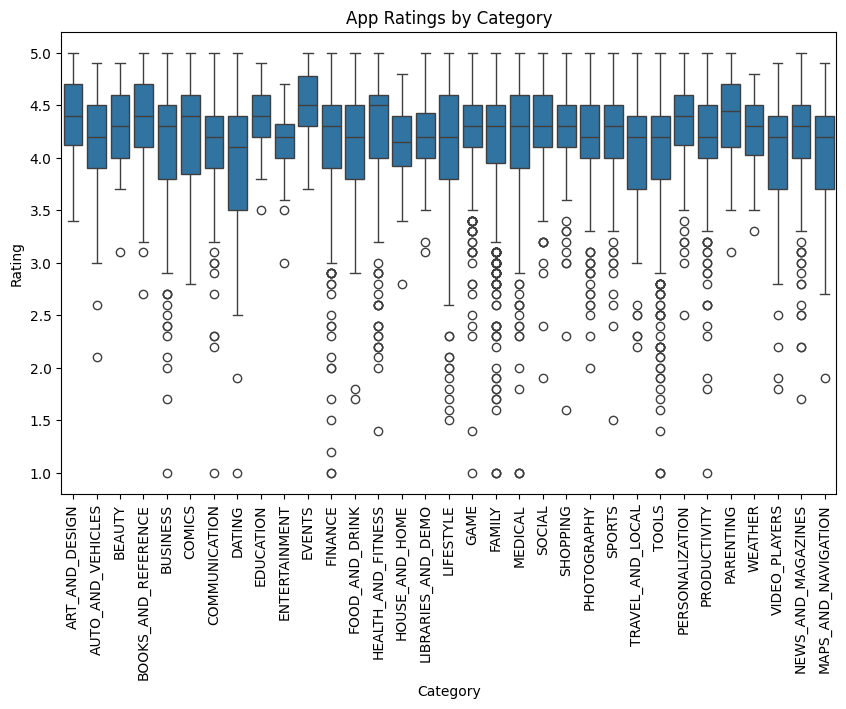

In [51]:
# Example visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=data)
plt.xticks(rotation=90)
plt.title('App Ratings by Category')
plt.show()